In [51]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# On charge le dataset
df = pd.read_csv('../data/02_intermediate/sampled_train.csv').sample(10000)

In [53]:
round(df.describe())

,Unnamed: 0,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,Distance,trip_duration_hours
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,721487.0,2.0,2.0,-74.0,41.0,-74.0,41.0,858.0,3.0,0.0
std,421056.0,0.0,1.0,0.0,0.0,0.0,0.0,674.0,4.0,0.0
min,9.0,1.0,1.0,-74.0,41.0,-74.0,41.0,121.0,0.0,0.0
25%,357076.0,1.0,1.0,-74.0,41.0,-74.0,41.0,412.0,1.0,0.0
50%,723812.0,2.0,1.0,-74.0,41.0,-74.0,41.0,677.0,2.0,0.0
75%,1082757.0,2.0,2.0,-74.0,41.0,-74.0,41.0,1071.0,4.0,0.0
max,1458594.0,2.0,6.0,-73.0,43.0,-73.0,43.0,9462.0,39.0,3.0


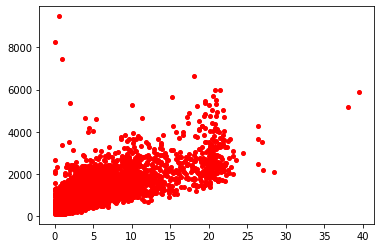

In [54]:
plt.plot(df['Distance'], df['trip_duration'], 'ro', markersize=4)
plt.show()

In [55]:
y = df.trip_duration
X = df[["Distance"]]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)

LinearRegression()

In [56]:
print("Le coefficient β1 est égal à {} tandis que l'intercept β0 est égal à {}"
      .format(round(regr.coef_[0],2),round(regr.intercept_)))

Le coefficient β1 est égal à 130.45 tandis que l'intercept β0 est égal à 405


In [57]:
x_to_predict = 25
x_df =  pd.DataFrame({'Distance': [x_to_predict]})

print("Selon le modèle, une distance de {} km doit se faire en {} secondes"
      .format(x_to_predict, round(regr.predict(x_df)[0])))

print("\n")

print ("On remarque que {} * {} + {} = {}"
       .format(x_to_predict,round(regr.coef_[0],2),round(regr.intercept_),
               x_to_predict*round(regr.coef_[0],2)+round(regr.intercept_)))

Selon le modèle, une distance de 25 km doit se faire en 3666 secondes


On remarque que 25 * 130.45 + 405 = 3666.2499999999995


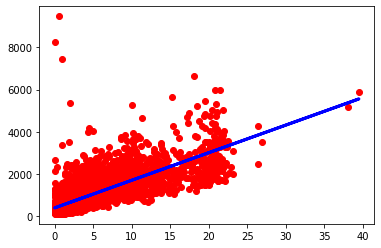

In [58]:
ytrainpred = regr.predict(xtrain)


# Plot outputs
plt.scatter(xtrain, ytrain,  color='red')
plt.plot(xtrain, ytrainpred, color='blue', linewidth=3)

plt.show()